<a href="https://colab.research.google.com/github/by-thoma/visualization-modeling/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Название | Описание | Формат | Шкала 
--- | --- | --- | --- | 
course id | номер для идентификации набора данных | int | номинальная | 
course title | название курса | str | номинальная |
url | URL курса | str | номинальная | 
is paid | платный/бесплатный курс | bool | порядковая | 
price | цена курса в долларах | int | относительная | 
num subscribers | количество подписок на курс | int | относительная | 
num reviews | количество отзывов | int | относительная |
num lectures | количество лекций | int | относительная | 
level | уровень сложности курса | str | порядковая | 
content duration | продолжительность всех материалов курса | float | относительная |
published timestamp | дата загрузки курса | date | относительная | 
subject | предмет курса | str | номинальная | 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter

In [ ]:
df = pd.read_csv("udemy_courses.csv")

In [ ]:
print(df.head()) # просмотр первых рядов
print(df.tail()) #нижних

   course_id  ...           subject
0    1070968  ...  Business Finance
1    1113822  ...  Business Finance
2    1006314  ...  Business Finance
3    1210588  ...  Business Finance
4    1011058  ...  Business Finance

[5 rows x 12 columns]
      course_id  ...          subject
3673     775618  ...  Web Development
3674    1088178  ...  Web Development
3675     635248  ...  Web Development
3676     905096  ...  Web Development
3677     297602  ...  Web Development

[5 rows x 12 columns]


Посмотрим типы столбцов таблицы

In [ ]:
print(df.dtypes)

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object


Подсчет нулевых значений по колонкам. Метод isna выводит таблицу со значениями true/False. если true значит ячейка пустая. Пустых значений нет

In [ ]:
cols = list(df.columns)
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'content_duration': 0,
 'course_id': 0,
 'course_title': 0,
 'is_paid': 0,
 'level': 0,
 'num_lectures': 0,
 'num_reviews': 0,
 'num_subscribers': 0,
 'price': 0,
 'published_timestamp': 0,
 'subject': 0,
 'url': 0}

Посмотрим статистические данные столбца с количеством подписчиков

In [ ]:
subs_stat = {
    'min': df['num_subscribers'].min(),
    'max': df['num_subscribers'].max(),
    'mean': df['num_subscribers'].mean(),#среднее арифм
    'median': df['num_subscribers'].median(),
    'mode': df['num_subscribers'].mode().to_list(),
    'var': df['num_subscribers'].var(ddof=0),# дисперсия. как величина колеблится
    'std': df['num_subscribers'].std(ddof=0),#стандартное отклонение
    'range': df['num_subscribers'].max() - df['num_subscribers'].min(),
    'interquartile_range': df['num_subscribers'].quantile(0.75) - df['num_subscribers'].quantile(0.25),
    'skew': df['num_subscribers'].skew()#асимметрия
            }
subs_stat

{'interquartile_range': 2435.0,
 'max': 268923,
 'mean': 3197.150625339859,
 'median': 911.5,
 'min': 0,
 'mode': [0],
 'range': 268923,
 'skew': 11.541417343075091,
 'std': 9502.824900172993,
 'var': 90303681.08334784}

# Круговая диаграмма платные \ бесплатные курсы

Выделение только платных курсов и нахождение процентного соотношения от всех курсов.

In [ ]:
paid_df = df.loc[df['is_paid'] == True]
paid_num = paid_df.shape[0]
paid_percent = paid_num/df.shape[0]*100
print("Кол-во платных курсов: ", paid_num,"Процентное соотношение: ",paid_percent,sep = '\n')

Кол-во платных курсов: 
3368
Процентное соотношение: 
91.57150625339858


Выделение только бесплатных курсов

In [ ]:
free_df = df.loc[df['is_paid'] == False]
free_num = free_df.shape[0]
free_percent = free_num/df.shape[0]*100
print("Кол-во бесплатных курсов:",free_num,"Процентное соотношение: ", free_percent,sep = '\n')


Кол-во бесплатных курсов:
310
Процентное соотношение: 
8.428493746601413


Как видно из процентных соотношений, выбранный датасет ориентирован в основном на платные курсы, поэтому на них можно получить более подробную и точную информацию. 

Круговая диаграмма хорошо визуализирует распределение платных и бесплатных курсов в данном датасете

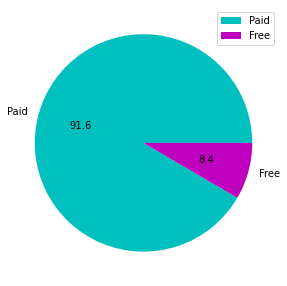

In [ ]:
Paid_pie = pd.DataFrame({"":[paid_num,free_num]}, index = ['Paid','Free'])
Paid_pie.plot.pie(y='',
                  colors = ['c','m'],
                  autopct = '%.1f',
                  fontsize = 10,
                  figsize = (5,5))


Т.к. датасет практически не содержит данных о бесплатных курсах, данные в дальнейшем берутся только о платных. 


#Распределение уровней подготовки

Создан список представляющий собой столбец: уровень подготовки. Подсчитывается количество каждого уникального значения. В отдельный датафрейм записываются уровни подготовки и количество каждого из них. Предположим, что количество курсов уровня "Эксперт" мало и незначительно по сравнению с остальными значениями

In [ ]:
levels_data = {name: paid_df['level'].to_list().count(name) for name in paid_df['level'].unique()}# создание списка со знач-и уровней подготовки
cases = []
levels = []
for level,cases_num in levels_data.items():
    levels.append(level)
    cases.append(cases_num)
levels_info = pd.DataFrame({'':cases},
                           index=levels)

Построим датафрейм без уровня эксперт

In [ ]:
cases1 = []
levels1 = []
for level,cases_num in levels_data.items():
    if level != 'Expert Level':
        levels1.append(level)
        cases1.append(cases_num)
levels_info1 = pd.DataFrame({'':cases1},index=levels1) 

Построение двух круговых диаграмм

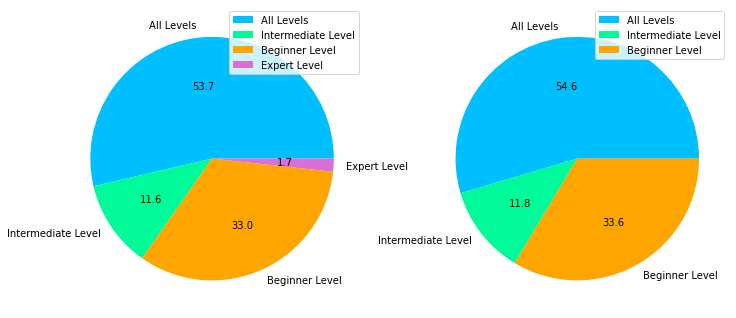

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2)
levels_info.plot.pie(ax = axes[0],y='',
                     colors=["deepskyblue", "mediumspringgreen", "orange", "orchid"],
                     autopct="%.1f",
                     fontsize=10,
                     figsize=(12, 12))
levels_info1.plot.pie(ax = axes[1],y='',
                      colors=["deepskyblue", "mediumspringgreen", "orange"],
                      autopct="%.1f",
                      fontsize=10,
                      figsize=(12, 12))

Видно, что про "Экспертный уровень" практически не упоминается в данном датасете, однако в перспективе можно выделить этот немаловажный класс и изучить отдельно.

 # Распределение всех курсов по предметным областям 

Создан датафрейм со значениями предмета курса и кол-ва каждого из них, построена столбиковая диаграмма, показывающая как курсы распределены по предметам.
Видно, что курсов по бизнес финансам и веб-разработке намного больше , чем остальных. Исследуем распределение подписчиков по этим предметным областям.

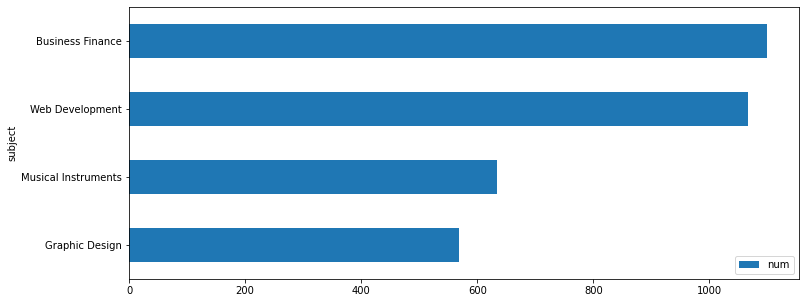

In [ ]:
subject_data = [(name,paid_df['subject'].to_list().count(name)) for name in paid_df['subject'].unique()
                if paid_df['subject'].to_list().count(name)>0] 
subject_data = sorted(subject_data,key = itemgetter(1))

subject = []
quantity =[]
for subjects,qual in subject_data:
    subject.append(subjects)
    quantity.append(qual)
subject_df = pd.DataFrame({'subject':subject,'num':quantity})

ax = subject_df.plot.barh(x = 'subject',y = 'num',figsize=(12,5))

#Распределение уровней по предметным областям

In [ ]:
level_data_lev = [(name,
                     paid_df['level'].to_list().count(name),
                     paid_df.query("subject == 'Graphic Design'")['level'].to_list().count(name),
                     paid_df.query("subject == 'Musical Instruments'")['level'].to_list().count(name),
                     paid_df.query("subject == 'Web Development'")['level'].to_list().count(name),
                     paid_df.query("subject == 'Business Finance'")['level'].to_list().count(name))
                    for name in paid_df['level'].unique()
                    if paid_df['level'].to_list().count(name)>0]
level_data_lev = sorted(level_data_lev,key=itemgetter(1))
level_df = pd.DataFrame.from_records(level_data_lev,
                                       columns=['Level','Total','Graphic Design','Musical Instruments',
                                                'Web Development','Business Finance'])
level_df

,Level,Total,Graphic Design,Musical Instruments,Web Development,Business Finance
0,Expert Level,58,5,7,15,31
1,Intermediate Level,391,55,96,118,122
2,Beginner Level,1112,225,264,323,300
3,All Levels,1807,283,267,611,646


Построена столбиковая диаграмма, по которой видно распределение предметных областей по уровням вхождения. 
Посмотрим какие курсы более доступны для непросвященного пользователя

                    Graphic Design  ...  Business Finance
Expert Level                     5  ...                31
Intermediate Level              55  ...               122
Beginner Level                 225  ...               300
All Levels                     283  ...               646

[4 rows x 4 columns]
                    Graphic Design  ...  Business Finance
Intermediate Level              55  ...               122
Beginner Level                 225  ...               300
All Levels                     283  ...               646

[3 rows x 4 columns]


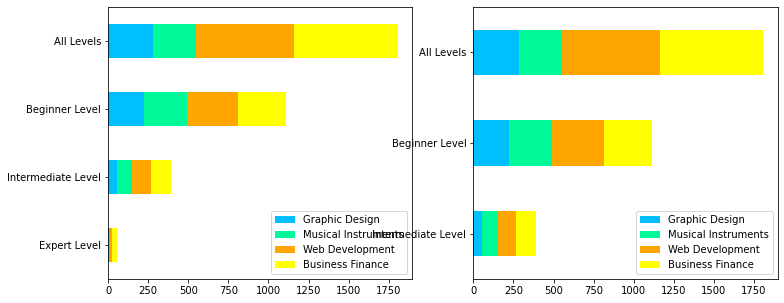

In [ ]:
level_df_opt = level_df[(level_df['Level'] !='Expert Level')]

df_draw = pd.DataFrame({'Graphic Design': level_df['Graphic Design'].to_list(),
                        'Musical Instruments': level_df['Musical Instruments'].to_list(),
                        'Web Development': level_df['Web Development'].to_list(),
                        'Business Finance': level_df['Business Finance'].to_list()},
                       index = level_df['Level'].to_list())

df_draw_opt = pd.DataFrame({'Graphic Design': level_df_opt['Graphic Design'].to_list(),
                        'Musical Instruments': level_df_opt['Musical Instruments'].to_list(),
                        'Web Development': level_df_opt['Web Development'].to_list(),
                        'Business Finance': level_df_opt['Business Finance'].to_list()},
                       index = level_df_opt['Level'].to_list())
print(df_draw)
print(df_draw_opt)

fig, axes = plt.subplots(nrows=1, ncols=2)
df_draw.plot.barh(ax=axes[0],
                  color=["deepskyblue", "mediumspringgreen", "orange", "yellow"],
                  stacked=True,
                  figsize=(12, 5));
df_draw_opt.plot.barh(ax=axes[1],
                      color=["deepskyblue", "mediumspringgreen", "orange","yellow"],
                      stacked=True,
                      figsize=(12, 5));

Видно, что наиболее доступными курсами по двум критериям являются курсы по Бизнес финансам. Посмотрим, какой разброс цен есть в курсах на эту тему. Возьме курсы по веб-разработке для сравнения.

#Курсы по каким предметам более дорогие

Построим гистограмму 

['[0;30)', '[30;60)', '[60;90)', '[90;120)', '[120;160)', '[160;200)']


Text(0, 0.5, 'Кол-во курсов')

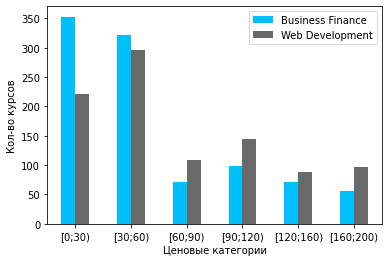

In [ ]:
q1 = 30
q2 = 60
q3 = 90
q4 = 120
q5 = 160
q6 = 200

index = ["[%d;%d)" %(paid_df['num_lectures'].min(),q1),
         "[%d;%d)" %(q1, q2),
         "[%d;%d)" %(q2, q3),
         "[%d;%d)" %(q3, q4),
         "[%d;%d)" %(q4, q5),
         "[%d;%d)" %(q5, q6)]#формирование ценовых категорий
print(index)

Business_pr = [paid_df.query("price < @q1 & subject == 'Business Finance'").shape[0],
         paid_df.query("@q1 <= price < @q2 & subject == 'Business Finance'").shape[0],
         paid_df.query("@q2 <= price < @q3 & subject == 'Business Finance'").shape[0],
         paid_df.query("@q3 <= price < @q4 & subject == 'Business Finance'").shape[0],
         paid_df.query("@q4 <= price < @q5 & subject == 'Business Finance'").shape[0],
         paid_df.query("@q5 <= price < @q6 & subject == 'Business Finance'").shape[0]]
Web_pr = [paid_df.query("price < @q1 & subject == 'Web Development'").shape[0],
         paid_df.query("@q1 <= price < @q2 & subject == 'Web Development'").shape[0],
         paid_df.query("@q2 <= price < @q3 & subject == 'Web Development'").shape[0],
         paid_df.query("@q3 <= price < @q4 & subject == 'Web Development'").shape[0],
         paid_df.query("@q4 <= price < @q5 & subject == 'Web Development'").shape[0],
         paid_df.query("@q5 <= price < @q6 & subject == 'Web Development'").shape[0]]# распределение каждого направления по 3 колонкам, разделенным категорией

Bus_or_Web = pd.DataFrame({"Business Finance": Business_pr, "Web Development": Web_pr}, index=index)
Bus_or_Web.plot.bar(color=["deepskyblue", "dimgrey"],
                       rot=0)
plt.xlabel("Ценовые категории")
plt.ylabel("Кол-во курсов")

Большинство курсов по данным направлениям расположены в ценовых категориях до 60 долларов. Дешевых курсов по бизнесу намного больше, чем курсов по вебу. Дешевых курсов по бизнесу намного больше, чем курсов по вебу.
Дорогих курсов по вебу намного больше,чем по бизнесу. В целом брать дешевые курсы по бизнесу доступнее, чем по вебу: они более многочисленные и их кол-во преобладает в средней и низшей ценовой категории. 

 # Колебание количества лекций в платных курсах

Text(0, 0.5, 'Кол-во лекций')

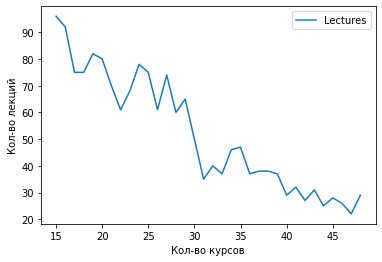

In [ ]:
qu1 = paid_df['num_lectures'].quantile(0.25)
qu2 = paid_df['num_lectures'].quantile(0.5)
qu3 = paid_df['num_lectures'].quantile(0.75)

df_Inter = paid_df.query('@qu1 <= num_lectures <=@qu3')
inter_lectures = pd.DataFrame.from_dict(data={lecture: df_Inter['num_lectures'].to_list().count(lecture)
                                             for lecture in set(df_Inter['num_lectures'])},
                                       orient = 'index',
                                       columns=['Lectures']).sort_index()
inter_lectures.plot()
plt.xlabel("Кол-во курсов")
plt.ylabel("Кол-во лекций")

Из графика видно,что в датасете преобладают курсы с небольшим количеством лекций. Возможно курсы с маленьким кол-вом лекций будут дешевле. Возможно будет зависимость между кол-вом лекций и цене курса. 

# Отзывы

Text(0, 0.5, 'Кол-во отзывов')

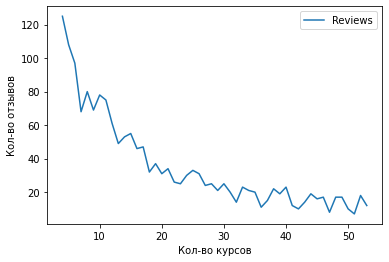

In [ ]:
qu1 = paid_df['num_reviews'].quantile(0.25)
qu2 = paid_df['num_reviews'].quantile(0.5)
qu3 = paid_df['num_reviews'].quantile(0.75)

df_Inter = paid_df.query('@qu1 <= num_reviews <=@qu3')
inter_reviews = pd.DataFrame.from_dict(data={review: df_Inter['num_reviews'].to_list().count(review)
                                             for review in set(df_Inter['num_reviews'])},
                                       orient = 'index',
                                       columns=['Reviews']).sort_index()
inter_reviews.plot()
plt.xlabel("Кол-во курсов")
plt.ylabel("Кол-во отзывов")

Видно, что подписчики курсов практически не пишут отзывов, что может плохо сказываться на их продвижении. 

# Кол-во лекций в курсах по разным предметам

 Попробуем найти распределения кол-ва лекций в курсах "Business Finance"и "Web Developmentценовые распределения которых нам известны. Постороена диаграмма распределения каждого из направлений по промежуткам по кол-ву лекций в курсе.


['[0;15)', '[15;26)', '[26;33)', '[33;42]', '[42;56]', '[56;68]']


Text(0, 0.5, 'Кол-во курсов')

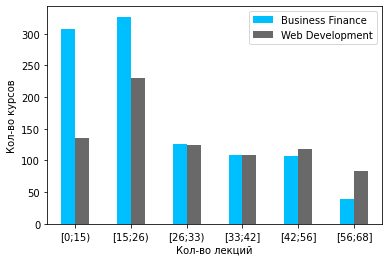

In [ ]:
q1 = paid_df["num_lectures"].quantile(0.25)
q2 = paid_df["num_lectures"].quantile(0.5)
q3 = paid_df["num_lectures"].quantile(0.6)
q4 = paid_df["num_lectures"].quantile(0.7)
q5 = paid_df["num_lectures"].quantile(0.8)
q6 = paid_df["num_lectures"].quantile(0.85)

index = ["[%d;%d)" %(round(paid_df['num_lectures'].min()), round(q1)),
         "[%d;%d)" %(round(q1), round(q2)),
         "[%d;%d)" %(round(q2), round(q3)),
         "[%d;%d]" %(round(q3), round(q4)),
         "[%d;%d]" %(round(q4), round(q5)),
         "[%d;%d]" %(round(q5), round(q6))]#формирование категорий по кол-ву материала
print(index)

Business_sub = [paid_df.query("num_lectures < @q1 & subject == 'Business Finance'").shape[0],
         paid_df.query("@q1 <= num_lectures < @q2 & subject == 'Business Finance'").shape[0],
         paid_df.query("@q2 <= num_lectures < @q3 & subject == 'Business Finance'").shape[0],
         paid_df.query("@q3 <= num_lectures < @q4 & subject == 'Business Finance'").shape[0],
         paid_df.query("@q4 <= num_lectures < @q5 & subject == 'Business Finance'").shape[0],
         paid_df.query("@q5 <= num_lectures < @q6 & subject == 'Business Finance'").shape[0]]
Web_sub = [paid_df.query("num_lectures < @q1 & subject == 'Web Development'").shape[0],
         paid_df.query("@q1 <= num_lectures < @q2 & subject == 'Web Development'").shape[0],
         paid_df.query("@q2 <= num_lectures < @q3 & subject == 'Web Development'").shape[0],
         paid_df.query("@q3 <= num_lectures < @q4 & subject == 'Web Development'").shape[0],
         paid_df.query("@q4 <= num_lectures < @q5 & subject == 'Web Development'").shape[0],
         paid_df.query("@q5 <= num_lectures < @q6 & subject == 'Web Development'").shape[0]]# распределение каждого направления по 3 колонкам, разделенным категорией

Bus_or_Web = pd.DataFrame({"Business Finance": Business_sub, "Web Development": Web_sub}, index=index)
Bus_or_Web.plot.bar(color=["deepskyblue", "dimgrey"],
                       rot=0)

plt.xlabel("Кол-во лекций")
plt.ylabel("Кол-во курсов")

В низшей категории кол-во лекций по бизнесу намного превышает кол-во лекций по бизнесу.
 Выяснилось, что одним из значимых критериев формирования цены является кол-во лекций.
 Выяснилось, что бизнесом заняться намного доступнее чем вебом:курсов на эту тему больше, многие из них находятся в низшей и средней ценовой категории и содержат достаточно больше кол-во материалов.